<a href="https://colab.research.google.com/github/sagar9926/ComputerVisionProject_FaceDetection/blob/main/yolov3_vs_hog_svm_AP_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this notebook I have compared the performances of YOLO and HOG - SVM by calculating the average precision.

In [ ]:
!cp /content/drive/MyDrive/YOLO_FaceDetection2/project_data.zip  /content

In [ ]:
!unzip /content/project_data.zip -d /content

Archive:  /content/project_data.zip
   creating: /content/project_data/
  inflating: /content/project_data/yolo_results_fd.zip  
  inflating: /content/__MACOSX/project_data/._yolo_results_fd.zip  
  inflating: /content/project_data/.DS_Store  
  inflating: /content/__MACOSX/project_data/._.DS_Store  
  inflating: /content/project_data/yolo_test_100_imgs_fd (1).zip  
  inflating: /content/__MACOSX/project_data/._yolo_test_100_imgs_fd (1).zip  
   creating: /content/project_data/detections/
  inflating: /content/__MACOSX/project_data/._detections  
  inflating: /content/project_data/fd_100_test_annotations (1).json  
  inflating: /content/__MACOSX/project_data/._fd_100_test_annotations (1).json  
   creating: /content/project_data/content 2/
  inflating: /content/__MACOSX/project_data/._content 2  
  inflating: /content/project_data/detections/.DS_Store  
  inflating: /content/__MACOSX/project_data/detections/._.DS_Store  
   creating: /content/project_data/detections/yolov3/
  inflating

## Average Precision Calculation YOLO

In [ ]:
import numpy as np

def calculate_iou(box1, box2):
    """Calculate the Intersection over Union (IoU) between two bounding boxes"""
   
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    
    xi1 = max(x1, x2)
    yi1 = max(y1, y2)
    xi2 = min(x1 + w1, x2 + w2)
    yi2 = min(y1 + h1, y2 + h2)
    
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    box1_area = w1 * h1
    box2_area = w2 * h2
    union_area = box1_area + box2_area - inter_area
    
    iou = inter_area / union_area
    return iou

In [ ]:
import os
data_yolo_list = []
for file in os.listdir("/content/project_data/detections/yolov3/output") :
  if '.txt' in file :
    with open("/content/project_data/detections/yolov3/output/" + file) as f :
      lines = [file + " " +line.rstrip() for line in f]
      data_yolo_list.append(lines)
data_yolo_list = sum(data_yolo_list,[])
data_yolo_list = [item.split() for item in data_yolo_list]



In [ ]:
import pandas as pd 
data_yolo = pd.DataFrame(data_yolo_list,columns = ['image_name','bbox_x_top_left','bbox_y_top_left','bbox_x_bottom_right','bbox_y_bottom_right','class','conf_score'])
for col in data_yolo.columns[1:] :
  data_yolo[col] = data_yolo[col].astype(float)

In [ ]:
data_yolo['image_name'] = data_yolo['image_name'].apply(lambda x : x.replace(".txt",""))

In [ ]:
data_yolo.head()

,image_name,bbox_x_top_left,bbox_y_top_left,bbox_x_bottom_right,bbox_y_bottom_right,class,conf_score
0,0_Parade_Parade_0_950.jpg,387.0,83.0,565.0,282.0,0.0,0.173543
1,0_Parade_marchingband_1_512.jpg,381.0,109.0,441.0,197.0,0.0,0.435809
2,0_Parade_marchingband_1_512.jpg,816.0,142.0,881.0,222.0,0.0,0.187157
3,1_Handshaking_Handshaking_1_885.jpg,570.0,64.0,736.0,298.0,0.0,0.207951
4,1_Handshaking_Handshaking_1_885.jpg,201.0,157.0,371.0,359.0,0.0,0.195131


In [ ]:
data_yolo['bbox_width'] =  data_yolo['bbox_x_bottom_right']  - data_yolo['bbox_x_top_left']
data_yolo['bbox_height'] =  data_yolo['bbox_y_bottom_right']  - data_yolo['bbox_y_top_left']

In [ ]:
data_yolo_pred = data_yolo[['image_name', 'bbox_x_top_left', 'bbox_y_top_left','bbox_width',
                 'bbox_height','conf_score']]

In [ ]:
data_yolo_pred = data_yolo_pred.rename(columns = {'bbox_x_top_left' : 'bbox_x','bbox_y_top_left' : 'bbox_y'})

In [ ]:
data_yolo_pred.sample(10)

,image_name,bbox_x,bbox_y,bbox_width,bbox_height,conf_score
34,0_Parade_Parade_0_780.jpg,35.0,1497.0,48.0,38.0,0.202793
69,0_Parade_Parade_0_928.jpg,396.0,83.0,229.0,258.0,0.205857
13,0_Parade_Parade_0_761.jpg,986.0,1381.0,23.0,53.0,0.212988
64,0_Parade_marchingband_1_925.jpg,259.0,328.0,306.0,384.0,0.185321
31,0_Parade_marchingband_1_1038.jpg,528.0,234.0,209.0,275.0,0.157666
16,0_Parade_Parade_0_761.jpg,949.0,1404.0,19.0,52.0,0.131289
102,0_Parade_marchingband_1_990.jpg,362.0,102.0,385.0,232.0,0.169033
50,0_Parade_marchingband_1_45.jpg,804.0,515.0,25.0,23.0,0.180124
36,0_Parade_Parade_0_632.jpg,409.0,149.0,162.0,171.0,0.151772
43,0_Parade_marchingband_1_1048.jpg,394.0,128.0,320.0,380.0,0.161922


## Reading Ground Truths

In [ ]:
import json
  
# Opening JSON file
with open('/content/project_data/fd_100_test_annotations (1).json') as f :
  data_gt_dict = json.load(f)


In [ ]:
ground_truth_list = []
for img_name in data_gt_dict :
  for bbox in data_gt_dict[img_name] :
    bbox_list = [img_name.split("/")[-1]]
    ground_truth_list.append(bbox_list + bbox)

In [ ]:
ground_truth_list[5]

['0_Parade_Parade_0_883.jpg', 532, 168, 219, 287]

In [ ]:
data_gt = pd.DataFrame(ground_truth_list,columns = ['image_name','bbox_x','bbox_y','bbox_width','bbox_height'])

In [ ]:
data_result = pd.merge(data_gt,data_yolo_pred,on = 'image_name',suffixes = ('_gt','_pred'))

In [ ]:
data_result.sample(10)

,image_name,bbox_x_gt,bbox_y_gt,bbox_width_gt,bbox_height_gt,bbox_x_pred,bbox_y_pred,bbox_width_pred,bbox_height_pred,conf_score
4,0_Parade_Parade_0_332.jpg,398,540,210,282,592.0,797.0,63.0,78.0,0.384073
36,0_Parade_Parade_0_703.jpg,42,203,14,17,909.0,214.0,21.0,30.0,0.162726
56,0_Parade_marchingband_1_45.jpg,676,599,41,50,939.0,528.0,32.0,35.0,0.168197
201,1_Handshaking_Handshaking_1_682.jpg,712,306,78,94,171.0,255.0,102.0,115.0,0.142611
40,0_Parade_Parade_0_811.jpg,564,122,124,144,339.0,245.0,151.0,155.0,0.110828
53,0_Parade_marchingband_1_45.jpg,676,599,41,50,42.0,519.0,37.0,42.0,0.201265
50,0_Parade_marchingband_1_45.jpg,676,599,41,50,819.0,539.0,81.0,89.0,0.302305
205,1_Handshaking_Handshaking_1_537.jpg,486,162,54,82,632.0,147.0,66.0,83.0,0.386808
199,1_Handshaking_Handshaking_1_682.jpg,188,270,76,94,171.0,255.0,102.0,115.0,0.142611
122,0_Parade_marchingband_1_897.jpg,286,390,131,162,568.0,338.0,123.0,130.0,0.153576


In [ ]:
data_result.isnull().sum()

image_name          0
bbox_x_gt           0
bbox_y_gt           0
bbox_width_gt       0
bbox_height_gt      0
bbox_x_pred         0
bbox_y_pred         0
bbox_width_pred     0
bbox_height_pred    0
conf_score          0
dtype: int64

In [ ]:
data_result['iou'] = data_result.apply(lambda row : calculate_iou(row[['bbox_x_pred', 'bbox_y_pred', 'bbox_width_pred',
       'bbox_height_pred']],row[['bbox_x_gt',
       'bbox_y_gt', 'bbox_width_gt', 'bbox_height_gt']]),axis = 1)

In [ ]:
data_result[data_result.image_name == '0_Parade_Parade_0_522.jpg']

,image_name,bbox_x_gt,bbox_y_gt,bbox_width_gt,bbox_height_gt,bbox_x_pred,bbox_y_pred,bbox_width_pred,bbox_height_pred,conf_score,iou
25,0_Parade_Parade_0_522.jpg,363,117,174,237,626.0,255.0,158.0,179.0,0.596660,0.000000
26,0_Parade_Parade_0_522.jpg,363,117,174,237,356.0,110.0,200.0,261.0,0.159804,0.790000
27,0_Parade_Parade_0_522.jpg,363,117,174,237,982.0,425.0,39.0,129.0,0.139291,0.000000
28,0_Parade_Parade_0_522.jpg,637,276,108,156,626.0,255.0,158.0,179.0,0.596660,0.595715
29,0_Parade_Parade_0_522.jpg,637,276,108,156,356.0,110.0,200.0,261.0,0.159804,0.000000
30,0_Parade_Parade_0_522.jpg,637,276,108,156,982.0,425.0,39.0,129.0,0.139291,0.000000


In [ ]:
## Eliminate the incorrect rows
idx = data_result.groupby(['image_name', 'bbox_x_pred', 'bbox_y_pred', 'bbox_width_pred',
       'bbox_height_pred'])['iou'].transform(max) == data_result['iou']
data_result = data_result[idx].reset_index(drop = True)
data_result.sort_values('iou',inplace = True,ascending = False)

In [ ]:
data_result[data_result.image_name == '0_Parade_Parade_0_522.jpg']

,image_name,bbox_x_gt,bbox_y_gt,bbox_width_gt,bbox_height_gt,bbox_x_pred,bbox_y_pred,bbox_width_pred,bbox_height_pred,conf_score,iou
17,0_Parade_Parade_0_522.jpg,363,117,174,237,356.0,110.0,200.0,261.0,0.159804,0.790000
19,0_Parade_Parade_0_522.jpg,637,276,108,156,626.0,255.0,158.0,179.0,0.596660,0.595715
20,0_Parade_Parade_0_522.jpg,637,276,108,156,982.0,425.0,39.0,129.0,0.139291,0.000000
18,0_Parade_Parade_0_522.jpg,363,117,174,237,982.0,425.0,39.0,129.0,0.139291,0.000000


In [ ]:
data_result = data_result.drop_duplicates(subset = ['image_name', 'bbox_x_pred', 'bbox_y_pred', 'bbox_width_pred','bbox_height_pred'],keep = 'first')

In [ ]:
data_result[data_result.image_name == '0_Parade_Parade_0_522.jpg']

,image_name,bbox_x_gt,bbox_y_gt,bbox_width_gt,bbox_height_gt,bbox_x_pred,bbox_y_pred,bbox_width_pred,bbox_height_pred,conf_score,iou,TP_or_FP (iou > .25),iou_rank,pred_cnt,TP_or_FP (iou > .5)
19,0_Parade_Parade_0_522.jpg,637,276,108,156,626.0,255.0,158.0,179.0,0.596660,0.595715,TP,1.0,2,TP
17,0_Parade_Parade_0_522.jpg,363,117,174,237,356.0,110.0,200.0,261.0,0.159804,0.790000,TP,1.0,1,TP
20,0_Parade_Parade_0_522.jpg,637,276,108,156,982.0,425.0,39.0,129.0,0.139291,0.000000,FP,2.0,2,FP


In [ ]:
data_result.sort_values("conf_score",ascending = False,inplace = True)

In [ ]:
iou_thres = 0.5
data_result['TP_or_FP (iou > .5)'] =  np.where(data_result.iou < iou_thres,'FP' ,'TP')


In [ ]:
data_result['TP_or_FP (iou > .5)'].value_counts()

TP    59
FP    53
Name: TP_or_FP (iou > .5), dtype: int64

In [ ]:
## In case of multiple predicted bounding box corresponding to same ground truth
## In some images there are more than one detection overlapping a ground truth 
## For those cases, the predicted box with the highest IOU is considered TP

data_result['iou_rank'] = data_result.groupby(['image_name', 'bbox_x_gt', 'bbox_y_gt', 'bbox_width_gt',
       'bbox_height_gt'])['iou'].rank(ascending=False)
       
data_result['pred_cnt'] = data_result.groupby(['image_name', 'bbox_x_gt', 'bbox_y_gt', 'bbox_width_gt',
       'bbox_height_gt']).image_name.transform('count')

In [ ]:
data_result[data_result.image_name == '0_Parade_Parade_0_522.jpg']

,image_name,bbox_x_gt,bbox_y_gt,bbox_width_gt,bbox_height_gt,bbox_x_pred,bbox_y_pred,bbox_width_pred,bbox_height_pred,conf_score,iou,TP_or_FP (iou > .25),iou_rank,pred_cnt,TP_or_FP (iou > .5)
19,0_Parade_Parade_0_522.jpg,637,276,108,156,626.0,255.0,158.0,179.0,0.596660,0.595715,TP,1.0,2,TP
17,0_Parade_Parade_0_522.jpg,363,117,174,237,356.0,110.0,200.0,261.0,0.159804,0.790000,TP,1.0,1,TP
20,0_Parade_Parade_0_522.jpg,637,276,108,156,982.0,425.0,39.0,129.0,0.139291,0.000000,FP,2.0,2,FP


In [ ]:
data_result['TP_or_FP (iou > .5)'] = np.where((data_result.pred_cnt >= 1) & (data_result.iou_rank == 1) & (data_result['TP_or_FP (iou > .5)'] != 'FP'),'TP','FP')

In [ ]:
data_result['TP_or_FP (iou > .5)'].value_counts()

TP    59
FP    53
Name: TP_or_FP (iou > .5), dtype: int64

In [ ]:
## Flag TP and FP
data_result['TP'] =  np.where(data_result['TP_or_FP (iou > .5)'] == 'TP',1 ,0)
data_result['FP'] =   np.where(data_result['TP_or_FP (iou > .5)'] == 'FP',1 ,0)

In [ ]:
data_result.head(10)

,image_name,bbox_x_gt,bbox_y_gt,bbox_width_gt,bbox_height_gt,bbox_x_pred,bbox_y_pred,bbox_width_pred,bbox_height_pred,conf_score,iou,TP_or_FP (iou > .25),iou_rank,pred_cnt,TP_or_FP (iou > .5),TP,FP
19,0_Parade_Parade_0_522.jpg,637,276,108,156,626.0,255.0,158.0,179.0,0.596660,0.595715,TP,1.0,2,TP,1,0
96,0_Parade_Parade_0_395.jpg,732,320,160,230,354.0,591.0,67.0,79.0,0.535840,0.000000,FP,2.0,2,FP,0,1
50,0_Parade_marchingband_1_45.jpg,21,544,19,19,17.0,533.0,28.0,30.0,0.498030,0.429762,TP,1.0,10,FP,0,1
135,1_Handshaking_Handshaking_1_537.jpg,362,170,56,90,353.0,170.0,61.0,78.0,0.484736,0.706374,TP,1.0,1,TP,1,0
71,0_Parade_marchingband_1_512.jpg,385,130,53,70,381.0,109.0,60.0,88.0,0.435809,0.652877,TP,1.0,1,TP,1,0
136,1_Handshaking_Handshaking_1_537.jpg,638,160,54,80,632.0,147.0,66.0,83.0,0.386808,0.628116,TP,1.0,1,TP,1,0
3,0_Parade_Parade_0_332.jpg,599,810,47,64,592.0,797.0,63.0,78.0,0.384073,0.612129,TP,1.0,1,TP,1,0
82,0_Parade_marchingband_1_116.jpg,232,109,67,90,229.0,111.0,81.0,73.0,0.360782,0.693562,TP,1.0,2,TP,1,0
14,0_Parade_Parade_0_595.jpg,93,183,106,133,76.0,169.0,129.0,161.0,0.319901,0.678800,TP,1.0,1,TP,1,0
115,1_Handshaking_Handshaking_1_438.jpg,445,415,68,95,441.0,399.0,103.0,106.0,0.318116,0.543613,TP,1.0,1,TP,1,0


In [ ]:
# data_result[data_result.image_name == '0_Parade_marchingband_1_45.jpg']

In [ ]:
data_result[data_result.image_name == '0_Parade_Parade_0_522.jpg']

,image_name,bbox_x_gt,bbox_y_gt,bbox_width_gt,bbox_height_gt,bbox_x_pred,bbox_y_pred,bbox_width_pred,bbox_height_pred,conf_score,iou,TP_or_FP (iou > .25),iou_rank,pred_cnt,TP_or_FP (iou > .5),TP,FP
19,0_Parade_Parade_0_522.jpg,637,276,108,156,626.0,255.0,158.0,179.0,0.596660,0.595715,TP,1.0,2,TP,1,0
17,0_Parade_Parade_0_522.jpg,363,117,174,237,356.0,110.0,200.0,261.0,0.159804,0.790000,TP,1.0,1,TP,1,0
20,0_Parade_Parade_0_522.jpg,637,276,108,156,982.0,425.0,39.0,129.0,0.139291,0.000000,FP,2.0,2,FP,0,1


In [ ]:
# qc = data_result.groupby(['image_name','bbox_x_gt','bbox_y_gt','bbox_width_gt','bbox_height_gt']).agg({'TP_or_FP (iou > .5)' : 'nunique'}).sort_values(['TP_or_FP (iou > .5)'],ascending = False)

In [ ]:
data_result['accumulated_TP'] = data_result.TP.cumsum()
data_result['accumulated_FP'] = data_result.FP.cumsum()

In [ ]:
data_result['precision'] = data_result['accumulated_TP'] / (data_result['accumulated_TP'] + data_result['accumulated_FP'])
data_result['recall'] =  data_result['accumulated_TP'] /data_gt.shape[0]

<Axes: title={'center': 'Precision - Recall Curve (Sample Wider Face data) @0.5 iou YOLO'}, xlabel='recall', ylabel='precision'>

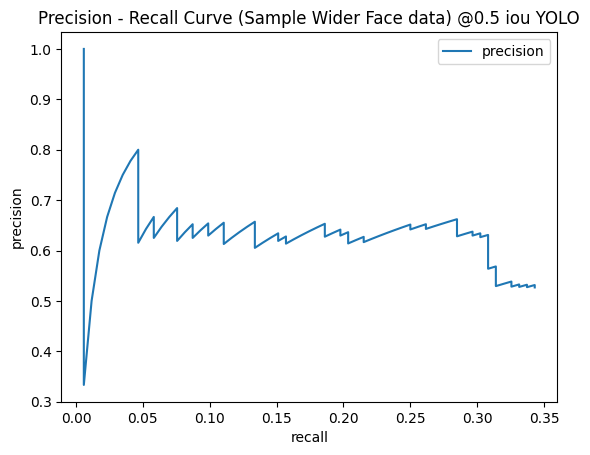

In [ ]:
data_result.plot.line(x='recall', y='precision',xlabel = 'recall',ylabel = 'precision',title = "Precision - Recall Curve (Sample Wider Face data) @0.5 iou YOLO")

In [ ]:
import numpy as np
import pandas as pd

def calculate_11pt_precision(df):
    # Sort the dataframe by increasing recall
    df = df.sort_values('recall')

    # Initialize variables for storing the 11-point interpolated precision values
    precisions = np.zeros(11)
    recalls = np.linspace(0, 1, num=11)

    # Loop over the 11 recall levels and calculate the corresponding interpolated precision
    for i, r in enumerate(recalls):
        if i == 0:
            # At the lowest recall level, the precision is simply the maximum precision achieved
            precisions[i] = df[df['recall'] >= r]['precision'].max()
        else:
            # At higher recall levels, the precision is the maximum precision achieved
            # at or after the current recall level
            precisions[i] = df[df['recall'] >= r]['precision'].max()

    # Create a new dataframe to store the 11-point interpolated precision values
    results_df = pd.DataFrame({'recall': recalls, 'precision': precisions})

    return results_df
results_df = calculate_11pt_precision(data_result).fillna(0)

In [ ]:
print("Average Precision : " ,results_df.precision.sum()/11)

Average Precision :  0.26895187870797627


<Axes: title={'center': '11 point interpolated Precision - Recall Curve (Sample Wider Face data) @0.5 iou YOLO)'}, xlabel='recall', ylabel='precision'>

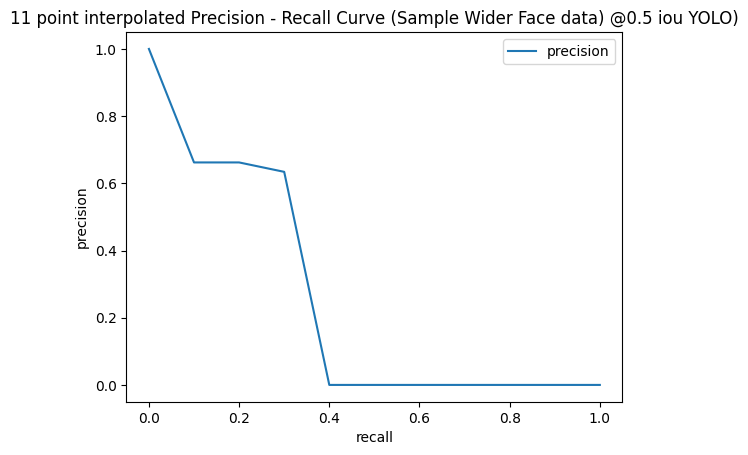

In [ ]:
results_df.plot.line(x='recall', y='precision',xlabel = 'recall',ylabel = 'precision',title = "11 point interpolated Precision - Recall Curve (Sample Wider Face data) @0.5 iou YOLO)")

## Average Precision Calculation HOG

In [ ]:
import os
data_hog_list = []
hog_dict = dict()
for file in os.listdir("/content/project_data/detections/hog/output") :
  if '.json' in file :
    with open("/content/project_data/detections/hog/output/" + file) as f :
      hog_dict = json.load(f)
  
    img_name = list(hog_dict.keys())[0]
    for bbox in hog_dict[img_name] :
      bbox_list = [img_name]
      data_hog_list.append(bbox_list + bbox)
    

In [ ]:
data_hog_list[0]

['1_Handshaking_Handshaking_1_924.jpg', 110, 170, 1.6185262682714256, 125, 125]

In [ ]:
import pandas as pd 
data_hog_pred = pd.DataFrame(data_hog_list,columns = ['image_name','bbox_x','bbox_y','conf_score','bbox_width','bbox_height'])
for col in data_hog_pred.columns[1:] :
  data_hog_pred[col] = data_hog_pred[col].astype(float)

In [ ]:
data_hog_pred['image_name'] = data_hog_pred['image_name'].apply(lambda x : x.replace(".txt",""))

In [ ]:
data_hog_pred.head()

,image_name,bbox_x,bbox_y,conf_score,bbox_width,bbox_height
0,1_Handshaking_Handshaking_1_924.jpg,110.0,170.0,1.618526,125.0,125.0
1,1_Handshaking_Handshaking_1_924.jpg,0.0,300.0,0.887802,156.0,156.0
2,1_Handshaking_Handshaking_1_924.jpg,10.0,500.0,0.843130,125.0,125.0
3,1_Handshaking_Handshaking_1_438.jpg,190.0,150.0,0.869449,156.0,156.0
4,1_Handshaking_Handshaking_1_410.jpg,140.0,20.0,0.967768,125.0,125.0


In [ ]:
data_hog_pred.sample(10)

,image_name,bbox_x,bbox_y,conf_score,bbox_width,bbox_height
23,1_Handshaking_Handshaking_1_572.jpg,0.0,190.0,1.054274,125.0,125.0
61,1_Handshaking_Handshaking_1_463.jpg,0.0,10.0,1.739376,381.0,381.0
38,1_Handshaking_Handshaking_1_234.jpg,110.0,90.0,0.975905,125.0,125.0
49,0_Parade_marchingband_1_251.jpg,260.0,400.0,1.172123,125.0,125.0
121,1_Handshaking_Handshaking_1_715.jpg,260.0,10.0,1.267909,125.0,125.0
82,0_Parade_marchingband_1_1031.jpg,70.0,70.0,1.291877,244.0,244.0
98,1_Handshaking_Handshaking_1_164.jpg,120.0,370.0,1.403119,125.0,125.0
52,0_Parade_marchingband_1_251.jpg,110.0,380.0,0.816634,125.0,125.0
7,0_Parade_marchingband_1_1015.jpg,230.0,30.0,1.943392,100.0,100.0
74,0_Parade_marchingband_1_887.jpg,220.0,140.0,1.213977,156.0,156.0


## Reading Ground Truths

In [ ]:
import json
  
# Opening JSON file
with open('/content/project_data/fd_100_test_annotations (1).json') as f :
  data_gt_dict = json.load(f)


In [ ]:
ground_truth_list = []
for img_name in data_gt_dict :
  for bbox in data_gt_dict[img_name] :
    bbox_list = [img_name.split("/")[-1]]
    ground_truth_list.append(bbox_list + bbox)

In [ ]:
ground_truth_list[5]

['0_Parade_Parade_0_883.jpg', 532, 168, 219, 287]

In [ ]:
data_gt = pd.DataFrame(ground_truth_list,columns = ['image_name','bbox_x','bbox_y','bbox_width','bbox_height'])

In [ ]:
data_result = pd.merge(data_gt,data_hog_pred,on = 'image_name',suffixes = ('_gt','_pred'))

In [ ]:
data_result.sample(10)

,image_name,bbox_x_gt,bbox_y_gt,bbox_width_gt,bbox_height_gt,bbox_x_pred,bbox_y_pred,conf_score,bbox_width_pred,bbox_height_pred
143,1_Handshaking_Handshaking_1_164.jpg,223,101,128,174,120.0,370.0,1.403119,125.0,125.0
61,0_Parade_marchingband_1_840.jpg,734,112,102,114,350.0,230.0,1.054897,100.0,100.0
199,1_Handshaking_Handshaking_1_331.jpg,213,225,255,321,220.0,80.0,1.198114,125.0,125.0
179,1_Handshaking_Handshaking_1_795.jpg,455,237,87,126,320.0,150.0,0.868741,100.0,100.0
91,0_Parade_marchingband_1_990.jpg,414,118,300,378,100.0,120.0,0.898695,156.0,156.0
121,0_Parade_marchingband_1_887.jpg,330,182,182,226,290.0,200.0,1.323591,125.0,125.0
0,0_Parade_marchingband_1_849.jpg,449,330,122,149,110.0,350.0,1.473050,125.0,125.0
27,0_Parade_Parade_0_595.jpg,450,161,127,174,160.0,240.0,0.841223,195.0,195.0
167,1_Handshaking_Handshaking_1_854.jpg,652,164,72,108,50.0,50.0,1.120032,125.0,125.0
162,1_Handshaking_Handshaking_1_463.jpg,408,128,219,309,20.0,50.0,0.820467,195.0,195.0


In [ ]:
data_result.isnull().sum()

image_name          0
bbox_x_gt           0
bbox_y_gt           0
bbox_width_gt       0
bbox_height_gt      0
bbox_x_pred         0
bbox_y_pred         0
conf_score          0
bbox_width_pred     0
bbox_height_pred    0
dtype: int64

In [ ]:
data_result['iou'] = data_result.apply(lambda row : calculate_iou(row[['bbox_x_pred', 'bbox_y_pred', 'bbox_width_pred',
       'bbox_height_pred']],row[['bbox_x_gt',
       'bbox_y_gt', 'bbox_width_gt', 'bbox_height_gt']]),axis = 1)

In [ ]:
## Eliminate the incorrect rows
idx = data_result.groupby(['image_name', 'bbox_x_pred', 'bbox_y_pred', 'bbox_width_pred',
       'bbox_height_pred'])['iou'].transform(max) == data_result['iou']
data_result = data_result[idx].reset_index(drop = True)
data_result.sort_values('iou',inplace = True,ascending = False)

In [ ]:
data_result = data_result.drop_duplicates(subset = ['image_name', 'bbox_x_pred', 'bbox_y_pred', 'bbox_width_pred','bbox_height_pred'],keep = 'first')

In [ ]:
data_result.sort_values("conf_score",ascending = False,inplace = True)

<ipython-input-145-28b5ccf55cbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_result.sort_values("conf_score",ascending = False,inplace = True)


In [ ]:
iou_thres = 0.2
data_result['TP_or_FP (iou > .2)'] =  np.where(data_result.iou < iou_thres,'FP' ,'TP')


In [ ]:
data_result['TP_or_FP (iou > .2)'].value_counts()

FP    123
TP      6
Name: TP_or_FP (iou > .2), dtype: int64

In [ ]:
## In case of multiple predicted bounding box corresponding to same ground truth
## In some images there are more than one detection overlapping a ground truth 
## For those cases, the predicted box with the highest IOU is considered TP

data_result['iou_rank'] = data_result.groupby(['image_name', 'bbox_x_gt', 'bbox_y_gt', 'bbox_width_gt',
       'bbox_height_gt'])['iou'].rank(ascending=False)
       
data_result['pred_cnt'] = data_result.groupby(['image_name', 'bbox_x_gt', 'bbox_y_gt', 'bbox_width_gt',
       'bbox_height_gt']).image_name.transform('count')

In [ ]:
data_result[data_result.image_name == '0_Parade_Parade_0_522.jpg']

,image_name,bbox_x_gt,bbox_y_gt,bbox_width_gt,bbox_height_gt,bbox_x_pred,bbox_y_pred,conf_score,bbox_width_pred,bbox_height_pred,iou,TP_or_FP (iou > .2),iou_rank,pred_cnt
33,0_Parade_Parade_0_522.jpg,637,276,108,156,190.0,80.0,1.782036,100.0,100.0,0.0,FP,1.0,1
28,0_Parade_Parade_0_522.jpg,363,117,174,237,250.0,320.0,1.136116,100.0,100.0,0.0,FP,3.0,5
29,0_Parade_Parade_0_522.jpg,363,117,174,237,80.0,370.0,0.914882,156.0,156.0,0.0,FP,3.0,5
30,0_Parade_Parade_0_522.jpg,363,117,174,237,330.0,510.0,0.885131,100.0,100.0,0.0,FP,3.0,5
31,0_Parade_Parade_0_522.jpg,363,117,174,237,130.0,590.0,0.867585,100.0,100.0,0.0,FP,3.0,5
32,0_Parade_Parade_0_522.jpg,363,117,174,237,170.0,350.0,0.863300,156.0,156.0,0.0,FP,3.0,5


In [ ]:
data_result['TP_or_FP (iou > .2)'] = np.where((data_result.pred_cnt >= 1) & (data_result.iou_rank == 1) & (data_result['TP_or_FP (iou > .2)'] != 'FP'),'TP','FP')

In [ ]:
data_result

,image_name,bbox_x_gt,bbox_y_gt,bbox_width_gt,bbox_height_gt,bbox_x_pred,bbox_y_pred,conf_score,bbox_width_pred,bbox_height_pred,iou,TP_or_FP (iou > .2),iou_rank,pred_cnt
91,0_Parade_Parade_0_763.jpg,252,244,541,696,40.0,60.0,4.044522,305.0,305.0,0.024553,FP,1.0,2
81,0_Parade_Parade_0_939.jpg,135,235,754,1133,0.0,50.0,3.184463,476.0,476.0,0.101088,FP,1.0,2
116,0_Parade_marchingband_1_1048.jpg,432,128,252,362,130.0,60.0,3.140392,156.0,156.0,0.000000,FP,1.0,1
14,0_Parade_marchingband_1_925.jpg,273,327,276,372,90.0,120.0,3.069664,156.0,156.0,0.000000,FP,2.5,3
119,0_Parade_Parade_0_395.jpg,468,530,70,82,360.0,170.0,2.888698,100.0,100.0,0.000000,FP,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0_Parade_marchingband_1_887.jpg,330,182,182,226,380.0,260.0,0.840298,100.0,100.0,0.243120,TP,1.0,2
144,1_Handshaking_Handshaking_1_463.jpg,408,128,219,309,20.0,50.0,0.820467,195.0,195.0,0.000000,FP,3.5,6
115,0_Parade_marchingband_1_358.jpg,27,480,309,324,310.0,430.0,0.820266,125.0,125.0,0.017137,FP,2.0,2
44,0_Parade_Parade_0_773.jpg,209,888,525,775,400.0,80.0,0.819309,100.0,100.0,0.000000,FP,1.5,2


In [ ]:
data_result['TP_or_FP (iou > .2)'].value_counts()

FP    125
TP      4
Name: TP_or_FP (iou > .2), dtype: int64

In [ ]:
## Flag TP and FP
data_result['TP'] =  np.where(data_result['TP_or_FP (iou > .2)'] == 'TP',1 ,0)
data_result['FP'] =   np.where(data_result['TP_or_FP (iou > .2)'] == 'FP',1 ,0)

In [ ]:
# data_result[data_result.image_name == '0_Parade_marchingband_1_45.jpg']

In [ ]:
# qc = data_result.groupby(['image_name','bbox_x_gt','bbox_y_gt','bbox_width_gt','bbox_height_gt']).agg({'TP_or_FP (iou > .5)' : 'nunique'}).sort_values(['TP_or_FP (iou > .5)'],ascending = False)

In [ ]:
data_result['accumulated_TP'] = data_result.TP.cumsum()
data_result['accumulated_FP'] = data_result.FP.cumsum()

In [ ]:
data_result['precision'] = data_result['accumulated_TP'] / (data_result['accumulated_TP'] + data_result['accumulated_FP'])
data_result['recall'] =  data_result['accumulated_TP'] /data_gt.shape[0]

<Axes: title={'center': 'Precision - Recall (Sample Wider Face data) @0.2 iou HOG'}, xlabel='recall', ylabel='precision'>

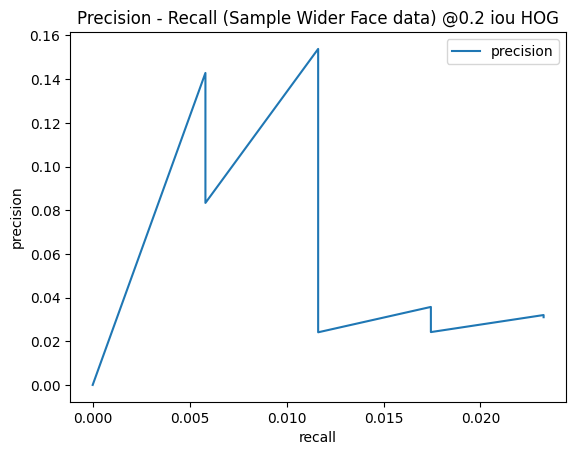

In [ ]:
data_result.plot.line(x='recall', y='precision',xlabel = 'recall',ylabel = 'precision',title = "Precision - Recall (Sample Wider Face data) @0.2 iou HOG")

In [ ]:
import numpy as np
import pandas as pd

def calculate_11pt_precision(df):
    # Sort the dataframe by increasing recall
    df = df.sort_values('recall')

    # Initialize variables for storing the 11-point interpolated precision values
    precisions = np.zeros(11)
    recalls = np.linspace(0, 1, num=11)

    # Loop over the 11 recall levels and calculate the corresponding interpolated precision
    for i, r in enumerate(recalls):
        if i == 0:
            # At the lowest recall level, the precision is simply the maximum precision achieved
            precisions[i] = df[df['recall'] >= r]['precision'].max()
        else:
            # At higher recall levels, the precision is the maximum precision achieved
            # at or after the current recall level
            precisions[i] = df[df['recall'] >= r]['precision'].max()

    # Create a new dataframe to store the 11-point interpolated precision values
    results_df = pd.DataFrame({'recall': recalls, 'precision': precisions})

    return results_df
results_df = calculate_11pt_precision(data_result).fillna(0)

In [ ]:
print("Average Precision : " ,results_df.precision.sum()/11)

Average Precision :  0.013986013986013986


<Axes: title={'center': '11 point interpolated Precision - Recall Curve (Sample Wider Face data) @0.2 iou HOG'}, xlabel='recall', ylabel='precision'>

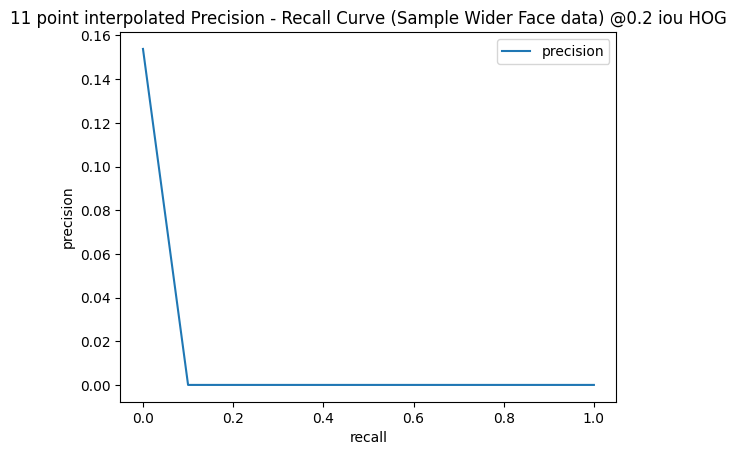

In [ ]:
results_df.plot.line(x='recall', y='precision',xlabel = 'recall',ylabel = 'precision',title = "11 point interpolated Precision - Recall Curve (Sample Wider Face data) @0.2 iou HOG")